<a href="https://colab.research.google.com/github/X4D0/MachineLearning/blob/main/Classification_1301184233_1301184220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tugas Besar 2
###MK Machine Learning 2020/2021

<b>Kelompok<b> 4 : <br> 

*   Rayhan Rahmanda (1301184233)
*   Muhammad Afif Raihan (1301184220)


<b>Kelas<b>: IF-42-04<br>

> Dalam penelitian ini, masalah yang akan diselesaikan adalah melakukan klasifikasi terhadap data-data dari dua dataset yang sudah disediakan, yaitu data_train dan data_test. Penelitian ini merupakan penelitian tahap lanjutan dari penelitian tahap clustering. Penelitian ini akan menggunakan metode klasifikasi logistic regression yang mana hasil akhirnya akan  mengklasifikasikan menjadi 2 output, yaitu apakah “besok turun salju” yang dinotasikan dengan angka (1) atau “besok tidak turun salju” yang dinotasikan sebagai angka (0).



# Pre-Processing Data

### Create Dataframe from the given Datasets & Deal with Missing Values

In [ ]:
import random
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset into Dataframe
df_train = pd.read_csv('https://raw.githubusercontent.com/X4D0/MachineLearning/main/Dataset/salju_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/X4D0/MachineLearning/main/Dataset/salju_test.csv')

# Drop Missing Values
df_test = df_test.dropna(axis = 0)
df_train = df_train.dropna(axis = 0)

In [ ]:
# print(df_test.shape)
# print(df_train.shape)
pd.DataFrame(df_train.columns,columns={"Nama Kolom/Attribut"})

,Nama Kolom/Attribut
0,id
1,Tanggal
2,KodeLokasi
3,SuhuMin
4,SuhuMax
5,Hujan
6,Penguapan
7,SinarMatahari
8,ArahAnginTerkencang
9,KecepatanAnginTerkencang


Dari informasi diatas dapat dilihat bahwa terdapat perbedaan pada jumlah kolom nya, Dataframe Train memiliki 1 Kolom lebih yaitu Kolom id sehingga perlu di Drop atau dihilangkan. Selain itu perlu dilakukan drop untuk atribut yang tidak berpengaruh dalam Classification ini seperti Tanggal, KodeLokasi, dan beberapa atribut lain nya yang bertipe Object. Dikarenakan pada saat perhitungan Correlation Matrix membutuhkan kolom-kolom yang berisi Angka/Numerik maka Kolom BersaljuBesok perlu diubah dari yes/no menjadi 1/0.



In [ ]:
# Drop unnecessary Columns
df_train = df_train.drop(['id', 'Tanggal', 'KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm', 'BersaljuHariIni'], axis=1)
df_test = df_test.drop(['Tanggal', 'KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm', 'BersaljuHariIni'], axis=1)

# Change Target Column value from yes/no to 1/0
df_train = df_train.replace({'BersaljuBesok': {'Ya': 1, 'Tidak': 0}})
df_test = df_test.replace({'BersaljuBesok': {'Yes': 1, 'No': 0}})
df_test.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuBesok
2,9.2,27.2,0.0,5.2,10.4,33.0,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0
3,17.7,27.0,0.0,4.6,6.7,35.0,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,0
7,14.4,22.4,0.0,4.4,3.9,28.0,9.0,11.0,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,0
8,20.3,33.7,0.0,11.8,11.1,52.0,20.0,24.0,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,0
10,8.1,18.2,0.0,1.6,5.1,31.0,11.0,15.0,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,0


### Data Exploration

View Dataframe Information :

In [ ]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42411 entries, 3 to 109093
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SuhuMin                   42411 non-null  float64
 1   SuhuMax                   42411 non-null  float64
 2   Hujan                     42411 non-null  float64
 3   Penguapan                 42411 non-null  float64
 4   SinarMatahari             42411 non-null  float64
 5   KecepatanAnginTerkencang  42411 non-null  float64
 6   KecepatanAngin9am         42411 non-null  float64
 7   KecepatanAngin3pm         42411 non-null  float64
 8   Kelembaban9am             42411 non-null  float64
 9   Kelembaban3pm             42411 non-null  float64
 10  Tekanan9am                42411 non-null  float64
 11  Tekanan3pm                42411 non-null  float64
 12  Awan9am                   42411 non-null  float64
 13  Awan3pm                   42411 non-null  float64
 14  Suhu9

In [ ]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7016 entries, 2 to 18180
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SuhuMin                   7016 non-null   float64
 1   SuhuMax                   7016 non-null   float64
 2   Hujan                     7016 non-null   float64
 3   Penguapan                 7016 non-null   float64
 4   SinarMatahari             7016 non-null   float64
 5   KecepatanAnginTerkencang  7016 non-null   float64
 6   KecepatanAngin9am         7016 non-null   float64
 7   KecepatanAngin3pm         7016 non-null   float64
 8   Kelembaban9am             7016 non-null   float64
 9   Kelembaban3pm             7016 non-null   float64
 10  Tekanan9am                7016 non-null   float64
 11  Tekanan3pm                7016 non-null   float64
 12  Awan9am                   7016 non-null   float64
 13  Awan3pm                   7016 non-null   float64
 14  Suhu9am

Kita juga dapat melihat variabel mana yang paling berpengaruh dalam memprediksi musim Salju di Hari esok dengan menggunakan Correlation Matrix.

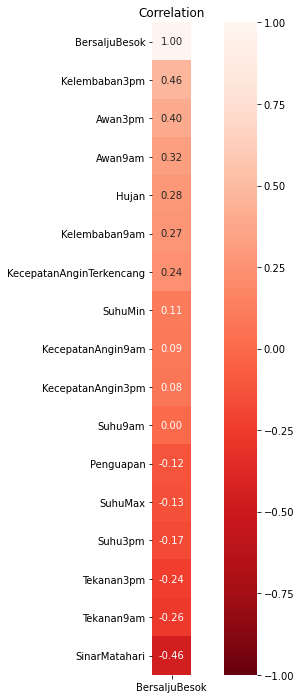

In [ ]:
# Correlation between all variables and the target
korelasi = df_test.corr()[['BersaljuBesok']] # The Target Column is BersaljuBesok
plt.figure(figsize=(12, 12)) # Figure Size
plt.title('Correlation') # Figure Title
sns.heatmap(korelasi.sort_values(by='BersaljuBesok', ascending=False), vmin=-1, vmax=1, annot=True, fmt='.2f', square=True, cmap = 'Reds_r') # Visualize the heatmap

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


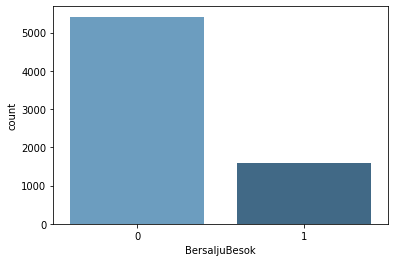

In [ ]:
sns.countplot("BersaljuBesok", data=df_test, palette='Blues_d')
plt.show()

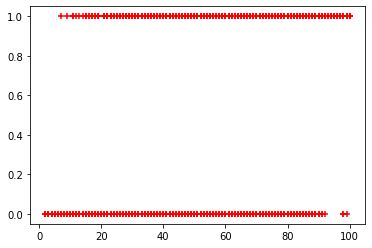

In [ ]:
plt.scatter(df_test.Kelembaban3pm,df_test.BersaljuBesok,marker='+',color='red')

## Data Split
X = Variabel Independent<br>
Y = Variabel Dependent

In [ ]:
X_train = df_train.loc[:, df_train.columns != 'BersaljuBesok'] # Variabel Independent Data Train
y_train = df_train[['BersaljuBesok']] # Variabel Dependent Data Train
X_test = df_test.loc[:, df_test.columns != 'BersaljuBesok'] # Variabel Independent Data Test
y_test = df_test[['BersaljuBesok']] # Variabel Dependent Data Test

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42411 entries, 3 to 109093
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SuhuMin                   42411 non-null  float64
 1   SuhuMax                   42411 non-null  float64
 2   Hujan                     42411 non-null  float64
 3   Penguapan                 42411 non-null  float64
 4   SinarMatahari             42411 non-null  float64
 5   KecepatanAnginTerkencang  42411 non-null  float64
 6   KecepatanAngin9am         42411 non-null  float64
 7   KecepatanAngin3pm         42411 non-null  float64
 8   Kelembaban9am             42411 non-null  float64
 9   Kelembaban3pm             42411 non-null  float64
 10  Tekanan9am                42411 non-null  float64
 11  Tekanan3pm                42411 non-null  float64
 12  Awan9am                   42411 non-null  float64
 13  Awan3pm                   42411 non-null  float64
 14  Suhu9

# Classification

### 1. Logistic Regression

In [ ]:
logReg = LogisticRegression(solver='lbfgs', max_iter=1000)
logReg.fit(X_train,y_train)
y_pred=logReg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 2. Confusion Matrix
Confusion Matrix merupakan pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih. Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual.

#### Evaluasi Model menggunakan Confusion Matrix

In [ ]:
con_matrix = metrics.confusion_matrix(y_test, y_pred)
con_matrix

array([[5131,  285],
       [ 755,  845]])

##### Visualisasi Confusion Matrix menggunakan Heatmap

Text(0.5, 15.0, 'Prediksi')

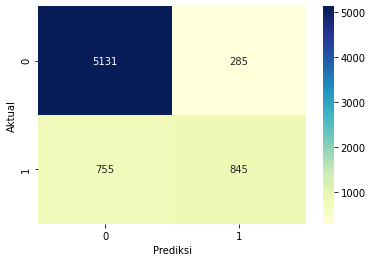

In [ ]:
sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')

#### Evaluasi Tingkat Akurasi

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8517673888255416


# Export Results

In [ ]:
hasil = pd.concat([X_test, y_test], axis=1)
hasil['Nilai Prediksi'] = y_pred
hasil.head()
hasil.to_csv('Classification Results.csv') #Uncomment this line to export the Dataset